In [1]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Embedding, Bidirectional, LSTM, Dropout, Dense
from keras import preprocessing
from nltk.corpus import stopwords
import string
import pickle


import numpy as np
from keras.datasets import imdb  
from keras.layers import Flatten  
from keras.layers.convolutional import Conv1D  
from keras.layers.convolutional import MaxPooling1D  
from keras.layers.embeddings import Embedding  
vocab_size = 19432
sentence_max_len = 39
model_path = 'cnn.hdf5'

Using TensorFlow backend.


In [2]:
# bulid the model and load the model_weight 
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=sentence_max_len))
model.add(Dropout(0.5))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.load_weights(model_path)

In [3]:
# turn a doc into clean tokens and join into the sentence
all_words_f = open("all_words.pickle", "rb")
all_words = pickle.load(all_words_f)
all_words_f.close()

sentences = open("filter_sentence.pickle", "rb")
filter_sentences = pickle.load(sentences)
sentences.close()

def clean_doc(doc):
    # split into tokens by white space
    tokens = doc.split()
    token_words = list()
    for w in tokens:
        token_words.append(w.lower())
    #remove the stop words and punctuation.
    stop_words = set(stopwords.words('english'))
    clean_words = [w for w in token_words if w in all_words]
    clean_words = ' '.join(clean_words)
    clean_words2= list()
    clean_words2.append(clean_words)

    return clean_words2

In [4]:
# define a function for data processing
def predict_text(twee):
    #return clean twee
    clean_twee=clean_doc(twee)
    # create the tokenizer
    tokenizer = Tokenizer()
    # fit the tokenizer on the documents
    tokenizer.fit_on_texts(filter_sentences)
    # sequence encode
    encoded_twee = tokenizer.texts_to_sequences(clean_twee)
    x = pad_sequences(encoded_twee, maxlen=39, padding='post')
    
    return model.predict_classes(x)

In [5]:
text='I like you, this is the best movie I have seen, like'
print(clean_doc(text))
print(predict_text(text))

['like best movie like']
1/1 [==============================] - 0s
[[1]]


In [8]:
# get the twitter text

import tweepy


# Step 1 - Authenticate
consumer_key='ZSw1btZ0hSDqUa5Rb5AK4Mrik'
consumer_secret='SvjAFiBXXZUpxZyhoBmsK4XbZQOzj7T4WLtBAhZrSniq39i4YG'

access_token='815156608716206080-zwpRzb3vuGVSEGjd7NssXjmI2PVgTju'

access_token_secret='V8r59n4EYYdzHlx9Ggqpy9zVy9AmVZcmOlKMSlraEPbvo'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.search('Trump',count=200)
for tweet in public_tweets:
    listx=[]
    twee=tweet.text
    listx= predict_text(twee)
    print(twee,listx)
    output = open("twitter-out-cnn.txt","a")
    output.write(str(listx))
    output.write('\n')
    output.close()

1/1 [==============================] - 0s
@Trumptweets2020 I have heard he does not intend to run again in 2018; that is why he can support Trump openly. [[0]]
1/1 [==============================] - 0s
RT @ByronYork: The 'bread crumbs' theory of the Mueller investigation has adherents in the media. https://t.co/UITPQcLgcC [[0]]
1/1 [==============================] - 0s
RT @NorskLadyWolf: Trump has NO idea how global economics works, so his idiotic proclamations are going to be the beginning of another depr… [[0]]
1/1 [==============================] - 0s
RT @VoteAngryNow: Russia launders money through the NRA
NRA through the GOP
GOP does everything the NRA says
Lobbyists wrote the GOP Taxpla… [[0]]
1/1 [==============================] - 0s
RT @draiochta14: Trump looks to America's past, not its future https://t.co/5aP1LWq1AP [[0]]
1/1 [==============================] - 0s
@CNN 
🇺🇸🇺🇸
🇺🇸🇺🇸🇺🇸🇺🇸
🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸🇺🇸
No, because OUR 45th @POTUS #Trump handles the government: "of the people, by the…

1/1 [==============================] - 0s
RT @GoodTwitty: Pro GOP / TRUMP Sinclair Broadcasting Its Sleazy -Mob Connected Bootleg  Porn Origins  https://t.co/YJlzImIm5X  😱☠️ https:/… [[0]]
1/1 [==============================] - 0s
RT @CNN: Special counsel Robert Mueller's office is defending an agreement it made with a Dutch lawyer tied to former Trump deputy campaign… [[0]]
1/1 [==============================] - 0s
RT @funder: Trump should be impeached for inviting Putin to the White House. Everyone who retweets this agrees. #ImpeachTrump [[1]]
1/1 [==============================] - 0s
RT @Cernovich: The Rasmussen Reports daily Presidential Tracking Poll for Monday shows that 50% of Likely U.S. Voters approve of President… [[1]]
1/1 [==============================] - 0s
RT @krassenstein: The President of the United States just straight up endorsed, Sinclair, a media organization that supports him, while att… [[1]]
1/1 [==============================] - 0s
RT @SebGorka: Despicable. 

@

1/1 [==============================] - 0s
RT @RedStormIsHERE: Calling ALL #PATRIOTS &amp; #TRUMPTRAIN call your SENATORS in your STATE to CONFIRM TRUMP'S PICK to help run our COUNTRY in… [[1]]
1/1 [==============================] - 0s
RT @funder: Trump should be impeached for inviting Putin to the White House. Everyone who retweets this agrees. #ImpeachTrump [[1]]
1/1 [==============================] - 0s
RT @Amy_Siskind: Sinclair Broadcasting is not happening in a vacuum - all in THE LIST:
Trump's DOJ is trying to get Time Warner to spin off… [[0]]
1/1 [==============================] - 0s
RT @TomSteyer: Question: Do you want to know if Trump is committing crimes against the U.S. by... [[1]]
1/1 [==============================] - 0s
RT @SenFeinstein: President Trump is absolutely wrong on DACA. He unilaterally rescinded DACA—for no reason—and has rejected every single b… [[0]]
1/1 [==============================] - 0s
RT @RyanAFournier: President Trump’s approval rating hits 50% accor

301


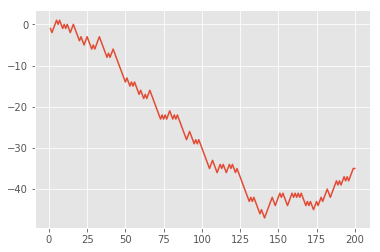

In [12]:
# visualization

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import time

style.use("ggplot")

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

def animate(i):
    pullData = open("twitter-out-cnn.txt","r").read()
    lines = pullData.split('\n')
    print(len(lines))
    xar = []
    yar = []

    x = 0
    y = 0

    for l in lines[-200:]:
        x += 1
        if "[[1]]" in l:
            y += 1
        elif "[[0]]" in l:
            y -= 1

        xar.append(x)
        yar.append(y)
        
    ax1.clear()
    ax1.plot(xar,yar)
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()